# ECC
先推薦一些不錯的教材:[1](http://andrea.corbellini.name/tag/ecc/),[2](https://engineering.purdue.edu/kak/compsec/NewLectures/Lecture14.pdf),[3](https://blog.cloudflare.com/a-relatively-easy-to-understand-primer-on-elliptic-curve-cryptography/),[4](https://jeremykun.com/category/cryptography/page/2/)

跟RSA一樣同樣用 elliptic curves, 通常我們可以做以下兩件事:

- Digital signatures (public key equivalent of message authentication codes) Alice 用 private key 簽署, 然後其他人用 public key 驗證
- Encryption with elliptic curves: 通常用來作金鑰交換， Alice 用 elliptic curve Diffie-Hellman (ECDH) 來產生跟Bob的 shared key

## Standard Curve

除了[certicom](https://www.certicom.com/)外，IEEE1363和NIST方面有定義出一些建議使用的curve，其中NIST三條標準的 elliptic curve 為:

- NIST P256 curve, which is equivalent to an AES-128 key (also known as secp256r1)
- NIST P384 curve, which is equivalent to an AES-192 key (also known as secp384r1)
- NIST P521 curve, which is equivalent to an AES-256 key (also known as secp521r1)

另外還有其他著名的curve像是 Curve25519 curve (key exchange使用), Ed25519 curve (數位簽章使用)，更多curve 選擇[可參考](http://safecurves.cr.yp.to/)

> 最近也有一個有趣的專案[Million Dollar Curve](http://cryptoexperts.github.io/million-dollar-curve/)，想要用樂透等公開random source來建立第三方可驗證的curve

ECC的 Key Exchange (ECDH) 紀錄在 in NIST publication [800-56Ar2](http://nvlpubs.nist.gov/nistpubs/SpecialPublications/NIST.SP.800-56Ar2.pdf)中

## Mathematics Behind Elliptic Curves

Elliptic curve是什麼呢? 事實上著名的Fermat's Last Theorem便是由elliptic curve解開的(不過是定義於實數域的elliptic curve)，可參考[數學女孩](http://www.books.com.tw/products/0010507212)

> [Wolfram MathWorld](http://mathworld.wolfram.com/EllipticCurve.html)有完整數學上的定義

我們可以把他想成由以下方程式組成的點:

$y^2=x^3+ax+b$

其中 $4a^3+27b^2 \neq 0$ (用來排除 singular curves). 這種形式稱為 Weierstrass normal form for elliptic curves

根據不同的a, b值, elliptic curves 會呈現不同的形狀， 我們在實數上畫出來 elliptic curves 是對稱x軸的!

通常我們會把**無窮遠點**也加入 curve中，我們將它標記為 0

故納入無窮遠點後的橢圓曲線為:

$\{(x,y)∈R^2 | y^2=x^3+ax+b, 4a^3+27b^2 \neq 0\} ∪ \{0\}$， 以下我們簡單的畫出elliptic curve和上面的點加法(後面會進一步介紹)給讀者參考:

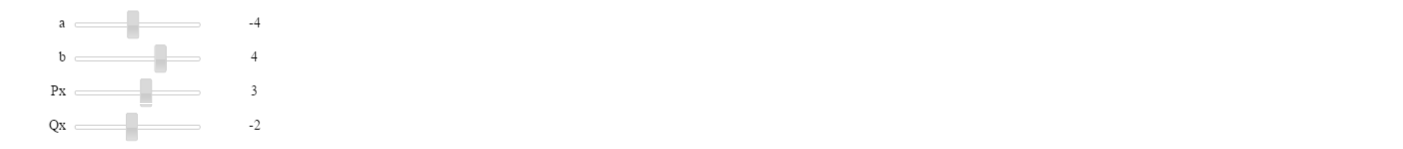

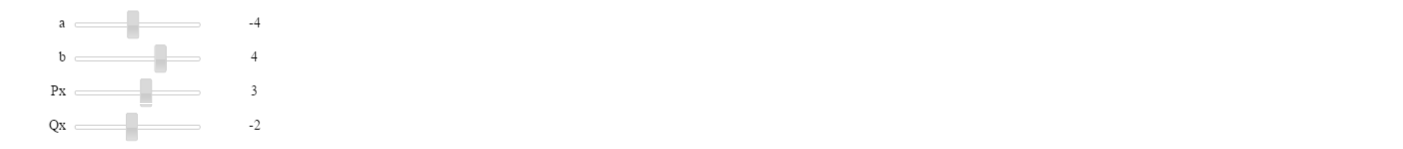

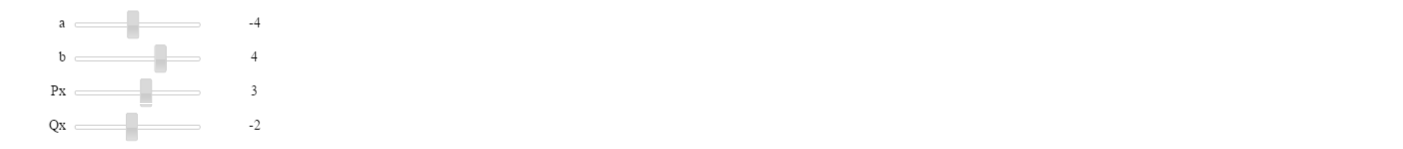

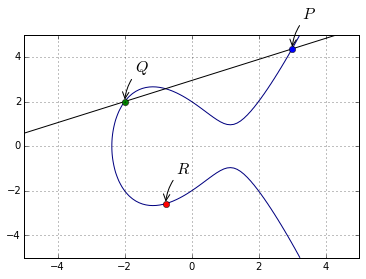

<function __main__.interactive_curve>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from elliptic import *
from fractions import Fraction as frac
import numpy.polynomial.polynomial as poly

def drawLine2P(x,y,xlims):
    xrange = np.arange(xlims[0],xlims[1],0.1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    plt.plot(xrange, k*xrange + b, 'k')

def interactive_curve(a=-4, b=4, Px=3, Qx=-2):
    if 4*a^3 + 27*b^2 == 0:
        print 'The choice of a = %s and b = %s does not define an elliptic curve because this makes 27a^3 + 4b^2 = 0.'%(a,b)
    else:
        y, x = np.ogrid[-5:5:100j, -5:5:100j]
        plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
        C = EllipticCurve(a=frac(a), b=frac(b))
        ro = poly.polyroots((b,a,0,1))
        ro = ro[np.isreal(ro)]
        if(len(ro) == 1):
            if Px < ro[0].real:
                Px = ro[0].real
            if Qx < ro[0].real:
                Qx = ro[0].real
        else:
            if ro[1].real < Px < ro[2].real:
                Px = ro[1].real
        P = C.from_x(frac(Px))
        Q = C.from_x(frac(Qx))
        R =  P + Q
        zero = Ideal(C)
        drawLine2P([float(P[0]),float(Q[0])],[float(P[1]),float(Q[1])],[-5,5])
        plt.plot(float(P[0]),float(P[1]), 'o')
        plt.plot(float(Q[0]),float(Q[1]), 'o')
        plt.plot(float(R[0]),float(R[1]), 'o')
        plt.xlim([-5,5])
        plt.ylim([-5,5])
        plt.annotate(r'$P$',
             xy=(float(P[0]), float(P[1])), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
        plt.annotate(r'$Q$',
             xy=(float(Q[0]), float(Q[1])), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
        plt.annotate(r'$R$',
             xy=(float(R[0]), float(R[1])), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

        plt.grid()
        plt.show()

from IPython.html.widgets import interact
interact(interactive_curve, a=[-10, 3], b=[-10,10], Px=[-20,20], Qx=[-20, 20])

### Group
我們這邊簡單介紹一些abstract algebra中的群論：一個set我們定義 "addition" 並標示為 +， 此 set G 稱之為 group, addition 必續根據下列四個性質來定義!

1. Closure: 若$a,b$在$G$內, 則$a+b$也要在 $G$內
2. Associativity: $(a+b)+c=a+(b+c)$
3. 有 identity element $0$ 使得 $a+0=0+a=a$
4. 所有元素有 inverse, 亦即對任意 $a$ 一定找的到 $b$ 使得 $a+b=0$

>若再加上 commutativity: $a+b=b+a$ 則此 group 稱為 abelian group.

我們常見的加法配上 integer numbers 組成的set $Z$ 便是 group (事實上他是 abelian group).然而自然數$N$就不是了，因為不符合第四個條件。

若我們能證明某一set滿足以上性質，我們就可以借用抽象代數中的群的相關特性!! 例如: identity element是唯一的，inverse也是唯一的

### Group Law of Elliptic Curve
#### Geometric addition

我們可以定義橢圓曲線群如下:

1. Group 中的元素是 elliptic curve上的點
2. Identity element 是無窮遠點 0;
3. 橢圓曲線上點 P 的 inverse 是對 x 軸鏡射的點

Addition定義為: 給定三個 aligned 且 non-zero 的點 P, Q, R, P+Q+R=0
![](http://andrea.corbellini.name/images/three-aligned-points.png)

經由這樣的定義我們可以得知這個點是無順序性不相關的，也就是說假設 P, Q, R 是 aligned, 則 P+(Q+R)=Q+(P+R)=R+(P+Q)=⋯=0. 因此我們的 ``+`` operator 是 associative 且 commutative 故為一個 abelian group! 既然在abelian group我們就可以把 P+Q+R=0 寫成 P+Q=-R 因此得到圖像加法如下:
![](http://andrea.corbellini.name/images/point-addition.png)

> 可以由[此](https://cdn.rawgit.com/andreacorbellini/ecc/920b29a/interactive/reals-add.html)來感受加法!!

#### Algebraic addition
接下來我們把上述加法寫成數學式，考慮兩個點$P=(x_P,y_P), Q=(x_Q,y_Q)$，假設兩者不同，通過兩點的線斜率為

$m = \frac{y_P - y_Q}{x_P - x_Q}$

而他與橢圓曲線的交點為$R = (x_R, y_R)$

$\begin{array}{rcl}
    x_R & = & m^2 - x_P - x_Q \\
    y_R & = & y_P + m(x_R - x_P)
\end{array}$

因此$(x_P, y_P) + (x_Q, y_Q) = (x_R, -y_R)$

> 若$P=Q$的話，經由微分$y_P = \pm \sqrt{x_P^3 + ax_P + b}$ 可得 $m = \frac{3 x_P^2 + a}{2 y_P}$

### Scalar Multiplication
連加$n$次$P$可寫成$nP$此運算稱為scalar multiplication。
> [這邊](https://cdn.rawgit.com/andreacorbellini/ecc/920b29a/interactive/reals-mul.html)可感受乘法

在實際時做上，我們可以藉由double-and-add來加速此運算

```
def bits(n):
    """
    Generates the binary digits of n, starting
    from the least significant bit.

    bits(151) -> 1, 1, 1, 0, 1, 0, 0, 1
    """
    while n:
        yield n & 1
        n >>= 1

def double_and_add(n, x):
    """
    Returns the result of n * x, computed using
    the double and add algorithm.
    """
    result = 0
    addend = x

    for bit in bits(n):
        if bit == 1:
            result += addend
        addend *= 2

    return result
```

### Logarithm
橢圓曲線基於的數學問題是elliptic curve discret logarithm problem(ECDLP): 給定$n, P$我們可以很快利用上述方法算出$Q=nP$，然而給$Q$和$P$要推$n$就不容易了...。

### Finite Field
實數域的elliptic curve並不能拿來密碼學使用(前述是在實數中)，這邊我們介紹Galois Field (Finite Field)。 Finite field 是一個元素為有限數目的set， 一個簡單的例子是 integers modulo p ($p$為質數)。 我們通常寫成 $Z/p, GF(p), F_p$. 

在 field 中我們有兩種 binary operations: addition (+) 和 multiplication (·)， 兩者皆為 closed, associative 且 commutative。對此兩種運算, 都存在著唯一的identity element， 且對field內的 element 都有唯一的 inverse element。 最後 multiplicationy在field中是 distributive over addition: $x⋅(y+z)=x⋅y+x⋅z$

> $x/y$在field中可寫成$x*y^{-1}$，

## EC over Finite Field
接下來我們將elliptic curve限制在 Finit Field中 (注意其仍為abelian group!)

$
\begin{array}{rcl}
  \left\{(x, y) \in (\mathbb{F}_p)^2 \right. & \left. | \right. & \left. y^2 \equiv x^3 + ax + b \pmod{p}, \right. \\
  & & \left. 4a^3 + 27b^2 \not\equiv 0 \pmod{p}\right\}\ \cup\ \left\{0\right\}
\end{array}
$

0 為無窮遠點, 且 a 和 b 為兩個 $F_p$中的 integer.

來感受一下現在他長怎麼樣吧( $y^2 \equiv x^3 - 7x + 10 \pmod{p}$ 當 $p=19,97,127,487$ 對每一x最多會有兩點y。 另外點是對 $y=p/2$ 對稱的!)

![](http://andrea.corbellini.name/images/elliptic-curves-mod-p.png)

經過此一限制之後，geometric addition會變得不太一樣(可以玩前述tool)，不過我們保持定義的話，algebra addition仍然可保持相同公式(多了modulus P)。

接下來我們可以證明出 multiples of P 實際上是一個 ``cyclic subgroup of the group formed by the elliptic curve``，藉此我們進一步定義出elliptic curve的order(所有點的數目)和點的order(加幾次可以回到自己)。

## Elliptic Curve for Cryptography
對密碼學應用來說，我們會去選擇高order的 subgroups。 實務上我們會先選 elliptic curve, 然後計算 order (N), 選擇 high divisor的(n) 來當 subgroup order， 最後找到適合的 base point。

Lagrange's theorem 告訴我們 $h=N/n$ 永遠是整數 (因為 $n$ 為 $N$的 divisor). $h$ 稱作 cofactor of the subgroup.

假設 $E$ 為定義在 field $K$ 上的 elliptic curve，根據 group addition law 我們可以知道每一個$E$上的點都可以產生出一個 cyclic group $G$。若這個 $G$ 的 order 是質數的話就可以用在cryptography上。

> 這表示group operation, inversion, hasing都可以很快完成，但是DLP很難解

因此跟$F^*$乘法群的對照便是**我們可以用$E(K)$上的點配上點加法來類比乘法群元素**。在乘法群中，我們會選擇一個$F^*$的subgroup $G$ order為$n$，但任意選通常不會有此order，因此常見的做法是用演算法隨機hash到一個 $x \in F^*$，然後再把他exponential 成 $N/n$，($N$為 $F^*$的元素數量)。

橢圓曲線也是如此，假設$N = \#E(K)$，

  - 選一個curve $E(K)$，計算他的 order N
  - 選一個prime $n$整除$N$，但是$n^2$不能整除$N$， 來建立出 order 為 $n$的 subgroup。並計算 cofactor $h=N/n$
  - 選擇隨機點 $P$，然後計算 $G=hP$ (hashing也是如此做)
  - 接下來group operation用addition，negate去反轉$y$做標，點乘法用point multiplication。

若 $G$ 為 $O$, 回到 step 3. 最後我們得到 subgroup with order $n$ 和 cofactor $h$.


### Domain Parameter
Elliptic curve algorithms 是定義於 **cyclic subgroup of an elliptic curve over a finite field** 因此我們會有下列參數:

- The prime $p$ that specifies the size of the finite field.
- The coefficients $a$ and $b$ of the elliptic curve equation.
- The base point $G$ that generates our subgroup.
- The order $n$ of the subgrouop.
- The cofactor $h$ of the subgroup.

也就是 domain parameters包含tuple $(p,a,b,G,n,h)$

事實上有些curve是不安全的，我們如何確保選出的curve是安全的呢，有一種常見作法如下
![](http://andrea.corbellini.name/images/random-parameters-generation.png)

> Curve 用此方法產生稱作 verifiably random. 這個用 hashes 產生 parameters 的方法叫 "nothing up my sleeve", 常常被用於 cryptography中

他給我們一些信心，curve不會是 crafted 而有特定 vulnerabilities 只有設計者知道。 事實上設計者給我們seed和curve， 他沒辦法控制我們選取 parameters $a$ 和 $b$， 因此比較有安全感。

> 標準產生和驗證 random curves 的方法訂於 ANSI X9.62 並用到 SHA-1. 可以看[SECG](http://www.secg.org/sec1-v2.pdf)的相關說明

可以用以下程式來確認:

In [ ]:
%%bash
python3 verifyrandom.py

## ECC

- Private key 為在$\{1,…,n−1\}$之間的 random integer $d$ ($n$ 為 subgroup 的order).
- Public key 為 $H=dG$ 這個point ($G$ 為 subgroup的base point).

接下來我們將重點放在 ECDH (Elliptic curve Diffie-Hellman)(用於加密), 和 ECDSA (Elliptic Curve Digital Signature Algorithm)(用於簽章)

In [ ]:
%%bash
python3 ecdhe.py

In [ ]:
%%bash
python3 ecdsa.py

> 最後，我們上述都是在prime filed, affine coordinate, Weierstrass form curve，更多的其他選擇和加法公式可參考 [EFD](https://hyperelliptic.org/EFD/)

## Pyelliptic
在這邊我們先使用 PyElliptic 這個提供 ECC class 的library，來實際應用在金鑰交換以及數位簽章上

### Generating Keys

假設我們AES用256 bit, 所以這邊至少要用到 P521的curve

In [2]:
import pyelliptic
def generate_key():
     return pyelliptic.ECC(curve='secp521r1')

Public 和 private keys 可以從curve exported 出來

In [3]:
curve = generate_key()
priv = curve.get_privkey()
pub = curve.get_pubkey()
print curve.get_curve()
print priv.encode('hex'), len(priv.encode('hex')), len(priv)
print pub.encode('hex'), len(pub.encode('hex')), len(pub)

secp521r1
015a128578899572cfa87c6ac06775dee5a65162a20ae6f172bca5392c0041f602949e140fc2549064d2cc72877118490d68579adbc5b7fa158fa9ea7883f522cac8 132 66
04009c084f51e7599738bc8525bc877cf0350573ca8ac6f6685ecd14182ffbb946a3d25baeeef61837710255e11105bc4470de84a29dc5505c88da3f4364d49776e08b004902edabfe1c39356eb795f42f527bf01644d06fa6e1498ba45e09d68afe4227430fa2a6b1eccbd1a5f6fed3e8f3a841dcb53e6e1dcb48b4bb8f3a4b2e6fd438c6 266 133


### Signing Messages

通常做數位簽章的時候， 我們會先計算 message 的 hash 再做簽章。 PyElliptic 會使用 SHA-512 來做 ECDSA.

In [4]:
def sign(key, msg):
    """Sign a message with the ECDSA key."""
    return key.sign(msg)

驗證時候的input是 serialised public key 然後匯入 pyelliptic.ecc.ECC instance 做運算

In [5]:
def verify(pub, msg, sig):
    """Verify the signature on a message."""
    return pyelliptic.ECC(curve='secp521r1', pubkey=pub).verify(sig, msg)

### Encryption

現在來說明如何用ECDH來產生shared key

用 pyelliptic時， private key 要是 instance of pyelliptic.ecc.ECC; 而 public key 要是 serialised form.

In [6]:
shared_key = curve.get_ecdh_key(pub)
len(shared_key)

32

In [7]:
def shared_key(curve, pub):
    """Generate a new shared encryption key from a keypair."""
    shared_key = curve.get_ecdh_key(pub)
    return shared_key

### Ephemeral keys

接下來我們來看看常見的 hybrid encryption的方式，我們會用 ephemeral keys 來做 encryption;也就是我們每次加密會產生 elliptic curve key pair 這種加密方法叫 elliptic curve integrated encryption scheme,  ECIES。 (或更準確來說，因為 key exchange 為 on the fly 完成，故稱為 ECDHE)

In [8]:
import struct
import Crypto.Random.OSRNG.posix as RNG
import Crypto.Cipher.AES as AES 
__AES_KEYLEN = 32

def generate_nonce():
    """Generate a random number used once."""
    return RNG.new().read(AES.block_size)

def pad_data(data):
    """pad_data pads out the data to an AES block length."""
    # return data if no padding is required
    if len(data) % 16 == 0:
        return data

    # subtract one byte that should be the 0x80
    # if 0 bytes of padding are required, it means only
    # a single \x80 is required.

    padding_required = 15 - (len(data) % 16)

    data = '%s\x80' % data
    data = '%s%s' % (data, '\x00' * padding_required)

    return data

def unpad_data(data):
    """unpad_data removes padding from the data."""
    if not data:
        return data

    data = data.rstrip('\x00')
    if data[-1] == '\x80':
        return data[:-1]
    else:
        return data

def sym_encrypt(data, key):
     """
     Encrypt data using AES in CBC mode. The IV is prepended to the
     ciphertext.
     """
     data = pad_data(data)
     ivec = generate_nonce()
     aes = AES.new(key, AES.MODE_CBC, ivec)
     ctxt = aes.encrypt(data)
     return ivec + ctxt
 
 
def sym_decrypt(ciphertext, key):
     """
     Decrypt a ciphertext encrypted with AES in CBC mode; assumes the IV
     has been prepended to the ciphertext.
     """
     if len(ciphertext) <= AES.block_size:
         raise Exception("Invalid ciphertext.")
     ivec = ciphertext[:AES.block_size]
     ciphertext = ciphertext[AES.block_size:]
     aes = AES.new(key, AES.MODE_CBC, ivec)
     data = aes.decrypt(ciphertext)
     return unpad_data(data)


def encrypt(pub, msg):
    """
    Encrypt the message to the public key using ECIES. The public key
    should be a serialised public key.
    """
    ephemeral = generate_key() # Alice's private key
    key = shared_key(ephemeral, pub) #Symmetric key derives from ECDH (alice_priv + bob_pub)
    ephemeral_pub = struct.pack('>H', len(ephemeral.get_pubkey()))
    print ephemeral_pub, len(ephemeral.get_pubkey())
    ephemeral_pub += ephemeral.get_pubkey() # Alice's public key
    print ephemeral_pub
    return ephemeral_pub + sym_encrypt(msg, key)

def decrypt(priv, msg):
    """
    Decrypt an ECIES-encrypted message with the private key.
    """
    ephemeral_len = struct.unpack('>H', msg[:2])[0]
    ephemeral_pub = msg[2:2+ephemeral_len] # Alice's public key
    key = shared_key(priv, ephemeral_pub) #symmetric key derives from ECDH(bob_priv, alice_pub)
    return sym_decrypt(msg[2+ephemeral_len:], key)

上述我們將 public key 加到開頭， 包含 public key 的長度，然後將 ciphertext 接在後面。 解密時需要解回 public key (先讀取 length 然後從  message 中擷取出 public key) 接著用ECDH 找出 shared key後進行訊息加密

In [9]:
curve = generate_key() # Bob generate private key
pub  = curve.get_pubkey() # Alice get the pubkey from Bob
plaintext = 'AG is god'
ciphertext = encrypt(pub, plaintext) # Alice encrypt message
print decrypt(curve, ciphertext) #Bob decrypt it

 � 133
 ��Ɠ �>�f'�@iA���VD��VHs�}�օ�ع{xI�v��t���8p�3_��z�ͩ�U�}�,�$��	�1�4��&�@jY?�V��V��.h�YI�0��Ê4�+�/�w[@-ٕI� �g�
AG is god


### Key Exchange

那麼 Alice 要如何得知public key是真的屬於Bob的呢? 認證方法有兩種: centralised and decentralised. 

TLS/SSL用的是 centralised 的方法: root certificate1 authority (CA) 簽署 intermediary CA 的 key, 然後intermediate CA 再簽署 user keys. 例如 Bob 產生 SSL keypair. 然後接著產生 certificate signing request (CSR) 並送給 CA 要求認證. CA根據不同等級進行收費和認證，最後進行簽署. Bob 將簽署好的 SSL certificate放上webserver， Alice 若相信簽署的CA就會用Bob的 public key，通常 Alice 的 web browser 會有 計載了部分 CA 的 public keys (像是 VeriSigns) 並幫她驗證各個網站的憑證. 這套系統就是 public key infrastructure (PKI)

另一個做法是 PGP 用 decentralised model. 在 PGP 中有一個 Web of Trust (信任網). 例如當 Carol 要傳訊息給 Bob 並把她的 public key給Bob， Bob 會去確認 Carol的 key 是否經過其他人簽署. 例如若　Bob 知道Alice的public key屬於 Alice 且相信她， 而 Alice 曾簽署 Carol’s key. Bob 在其憑證上看到 Alice的 signature 則他對 Carol的信任度就會提高. 接著假設 Dave 的 key 有被 Carol 簽署過, Bob 會對 Dave多一些信心, 但可能沒那麼高，因為他未必相信Carol是合法的簽署者. 基由以上機制，Bob會有 **various trust levels**, 進而形成 web of trust 

接下來看一個完整的例子

In [10]:
import binascii
# Asymmetric encryption
alice = pyelliptic.ECC() # default curve: sect283r1
bob = pyelliptic.ECC(curve='sect571r1')

ciphertext = alice.encrypt("Hello Bob", bob.get_pubkey(),
                           ephemcurve='sect571r1')
print(bob.decrypt(ciphertext))

signature = bob.sign("Hello Alice")
# alice's job :
print(pyelliptic.ECC(pubkey=bob.get_pubkey(),
                     curve='sect571r1').verify(signature, "Hello Alice"))

# ERROR !!!
try:
    key = alice.get_ecdh_key(bob.get_pubkey())
except:
    print("For ECDH key agreement, the keys must be defined on the same curve !")

alice = pyelliptic.ECC(curve='sect571r1')
print(binascii.hexlify(alice.get_ecdh_key(bob.get_pubkey())))
print(binascii.hexlify(bob.get_ecdh_key(alice.get_pubkey())))

Hello Bob
True
For ECDH key agreement, the keys must be defined on the same curve !
0215667cc3ed08b482889e248dc521de9acf99bc4e5db4bc1bc6ed2af3a3f192
0215667cc3ed08b482889e248dc521de9acf99bc4e5db4bc1bc6ed2af3a3f192


## Cryptography

我們進一步貼近實務，通常key會經過key derivation function，上述的ECDHE 會比 ECDH更好，因為它提供了 forward secrecy

> 記得對於每次 exchange() 我們需要有對應的  generate_private_key() (ECDHE key exchange)

In [1]:
import cryptography
print (cryptography.__version__)

1.4


In [3]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import ec

message = b"encrypted data"
private_key = ec.generate_private_key(
    ec.SECP384R1(), default_backend()
) # Alice private key
peer_public_key = ec.generate_private_key(
    ec.SECP384R1(), default_backend()
).public_key() # Bob's private key and public key
shared_key = private_key.exchange(ec.ECDH(), peer_public_key)
print (shared_key, len(shared_key))

b'\x89\x1ej\x85\xd2\\\x98\xdf\x0b\xf6:CQ\xc0\xfc\xdf\x05\xc9\xeb\xfc1\xe0\xfd/\xf3\xd1j#\xf3G\xcb\xf4;\xe1\xa6%Rb\x9a\xf0\x02-1\xaed\xc7G\xdb' 48


簽章看看吧，我們依照[FIPS 186-4](http://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.186-4.pdf) 來簽

``decode_dss_signature()`` 可以解回DER形式儲存的 signature

> 複習一下，PEM 為 encapsulation format,他可以是數種不同的 key types. 另外 PEM keys 是可讀的會有以下形式: -----BEGIN {format}----- ....-----END {format}-----.

> 另一方面，DER 是 ASN.1 encoding type.他不是encapsulation且 data 是 binary

In [5]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives.asymmetric.utils import decode_dss_signature

private_key = ec.generate_private_key(
    ec.SECP384R1(), default_backend()
) # Alice private key
public_key = private_key.public_key() # Alice public key
signer = private_key.signer(ec.ECDSA(hashes.SHA256())) # Specify signing alog. and hash function
message = b"this is some data I'd like to sign"
signer.update(message)
signature = signer.finalize()
print (signature, decode_dss_signature(signature))
verifier = public_key.verifier(signature,ec.ECDSA(hashes.SHA256()))
verifier.update(message)
verifier.verify()

b'0f\x021\x00\xc8\xd0Z\xf4\xb7?\x17>s1Y\xfdh\xe8\xac\x837e\xe4\xab\xf8\xa4\xa1h\xb6\xd4,\x8b\xc8\x9a\x10y8\x1b\x8e\xb9q\x1fi\xdc\xc6\x1dC\xca\xfa\xa6\xd1\x1e\x021\x00\xe8\xb9\xb0O\xf5#\x07\xb8p\xed\xa1\x90:\x1b\xc9\x13\x05\x1c\x0fw\xcb8\xbc\x86u\x0f\n\x15\r@\xf5\xcf\x10\x1d{[(HuO\xfe\xa5\x1c2\xd2W\xca\x97' (30908086150234631117714898008013435892933407549242921165484949594217951499229372249293784529147903169918884546793758, 35819709169227499427924560879277223896697649225502381654726972326434374105261116333677247359836034440264168412531351)


True

## OpenSSL

In [1]:
%%bash
openssl ecparam -list_curves

  secp112r1 : SECG/WTLS curve over a 112 bit prime field
  secp112r2 : SECG curve over a 112 bit prime field
  secp128r1 : SECG curve over a 128 bit prime field
  secp128r2 : SECG curve over a 128 bit prime field
  secp160k1 : SECG curve over a 160 bit prime field
  secp160r1 : SECG curve over a 160 bit prime field
  secp160r2 : SECG/WTLS curve over a 160 bit prime field
  secp192k1 : SECG curve over a 192 bit prime field
  secp224k1 : SECG curve over a 224 bit prime field
  secp224r1 : NIST/SECG curve over a 224 bit prime field
  secp256k1 : SECG curve over a 256 bit prime field
  secp384r1 : NIST/SECG curve over a 384 bit prime field
  secp521r1 : NIST/SECG curve over a 521 bit prime field
  prime192v1: NIST/X9.62/SECG curve over a 192 bit prime field
  prime192v2: X9.62 curve over a 192 bit prime field
  prime192v3: X9.62 curve over a 192 bit prime field
  prime239v1: X9.62 curve over a 239 bit prime field
  prime239v2: X9.62 curve over a 239 bit prime field
  prime239v3: X9.62 curv

In [2]:
%%bash
openssl ecparam -param_enc explicit -conv_form uncompressed -text -noout -no_seed -name secp112r1

Field Type: prime-field
Prime:
    00:db:7c:2a:bf:62:e3:5e:66:80:76:be:ad:20:8b
A:   
    00:db:7c:2a:bf:62:e3:5e:66:80:76:be:ad:20:88
B:   
    65:9e:f8:ba:04:39:16:ee:de:89:11:70:2b:22
Generator (uncompressed):
    04:09:48:72:39:99:5a:5e:e7:6b:55:f9:c2:f0:98:
    a8:9c:e5:af:87:24:c0:a2:3e:0e:0f:f7:75:00
Order: 
    00:db:7c:2a:bf:62:e3:5e:76:28:df:ac:65:61:c5
Cofactor:  1 (0x1)


> 6-4 sony ps3的 attack

## Discrte Logarithm Problem
給定橢圓曲線上兩點 $P$ 和 $Q$ 試著找出滿足 $Q=xP$ 的整數$x$。 記得這些點為 elliptic curve的一個subgroup， base point 為 $G$，而$G$的order 為 $n$。

### Baby-step, giant-step
我們可以把一個整數 $x$ 寫成 $x=am+b$，其中 $a, m, b$ 皆為任意的整數。 例如我們可以把 $10$ 寫成 $2⋅3+4$

同理我們可以把 discrete logarithm problem 寫成：

$
Q=xP
$

$
Q=(am+b)P
$

$
Q=amP+bP
$

$
Q−amP=bP
$

Baby-step giant-step 的想法是 "meet in the middle"。 和 brute-force attack 不一樣的地方是，攻擊者先計算 "一些" $bP$ 的數值和 "一些" $Q−amP$ 的數值直到它們相等，如下所示:

1.計算 $m=\lceil\sqrt n\rceil $

2.對於每一個在 $0,...,m$ 的 $b$ 計算 $bP$ 然後將它存入 hash table。

3.對於每一個在 $0,...,m$ 的 $a$

    1. 計算$amP$
    
    1. 計算 $Q−amP$
    
    1. 尋找 hash table 中是否存在一個點 $bP$ 使得 $Q−amP=bP$
    
    1. 若存在我們回傳 $x=am+b$